Данная работа подразумевает под собой изучение корпусной лингвистики и анализа настроений на основе высказываний философов.

Анализ настроений – это задача обработки естественного языка, при которой мы обнаруживаем положительное, отрицательное или нейтральное настроение отрывка текста. Например, анализ настроений используется компаниями для анализа мнений клиентов о своих продуктах или услугах, чтобы они могли использовать положительные настроения для продвижения своих продуктов или услуг и отрицательные настроения для улучшения качества своих продуктов или услуг.

Суть работы заключается в том, чтобы в упрощённом виде описать настроения высказываний философа. То есть, на основе большого количества абзацев построить и визаулизировать облако ключевых слов и настроения текста.

Прикрепленный набор данных содержит в себе 30 исчерпывающих высказываний разных философов.

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sb
import re
import tqdm
from time import perf_counter

for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print( '' + os.path.join(dirname, filename))

In [7]:
dataFrame = pd.read_csv('philosophy_data.csv')
dataFrame[0:10]

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."
5,Plato - Complete Works,Plato,plato,But someone else has indicted you?,But someone else has indicted you?,-350,1997,34,but someone else has indicted you?,"['but', 'someone', 'else', 'has', 'indicted', ...",but someone else have indict -PRON- ?
6,Plato - Complete Works,Plato,plato,"I do not really know him myself, Euthyphro.","I do not really know him myself, Euthyphro.",-350,1997,43,"i do not really know him myself, euthyphro.","['do', 'not', 'really', 'know', 'him', 'myself...","-PRON- do not really know -PRON- -PRON- , Eut..."
7,Plato - Complete Works,Plato,plato,He is apparently young and unknown.,He is apparently young and unknown.,-350,1997,35,he is apparently young and unknown.,"['he', 'is', 'apparently', 'young', 'and', 'un...",-PRON- be apparently young and unknown .
8,Plato - Complete Works,Plato,plato,"They call him Meletus, I believe.","They call him Meletus, I believe.",-350,1997,33,"they call him meletus, i believe.","['they', 'call', 'him', 'meletus', 'believe']","-PRON- call -PRON- Meletus , -PRON- believe ."
9,Plato - Complete Works,Plato,plato,"He belongs to the Pitthean deme, if you know a...","He belongs to the Pitthean deme, if you know a...",-350,1997,147,"he belongs to the pitthean deme, if you know a...","['he', 'belongs', 'to', 'the', 'pitthean', 'de...","-PRON- belong to the Pitthean deme , if -PRON..."


Ниже мы описываем класс для суммирования текстов. Основная идея этого алгоритма заключается в том, чтобы найти предложение, которое содержит максимальное количество наиболее часто используемых слов в блоке текстов после удаления стоп-слов (таких как the, is, that и т.д.)

In [18]:
!pip install wordcloud
!pip install spacy
!python -m spacy download en_core_web_lg
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     -------------------------------------- 0.0/587.7 MB 217.9 kB/s eta 0:44:58
     -------------------------------------- 0.0/587.7 MB 217.9 kB/s eta 0:44:58
     -------------------------------------- 0.1/587.7 MB 328.2 kB/s eta 0:29:51
     -------------------------------------- 0.1/587.7 MB 554.9 kB/s eta 0:17:39
     -------------------------------------- 0.2/587.7 MB 962.7 kB/s eta 0:10:11
     ---------------------------------------- 0.3/587.7 MB 1.2 MB/s eta 0:07:56
     ---------------------------------------- 0.5/587.7 MB 1.4 MB/s eta 0:06:47
     ---------------------------------------- 0.8/587.7 MB 2.3 MB/s eta 0:04:17
     ---------------------------------------- 1.2/587.7 MB 3.1 MB/s eta 0:03:09
     ---------------------------------------- 1.8/587.7 MB 4.

In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
stopwords = list (STOP_WORDS)
punctuation += '\n'
from heapq import nlargest


class Summarizer():

    def __init__(self, path = None, corpus = None):
        self.mCorpus = ''
        self.mWordFrequencies = {}
        self.mSentScore = {}
        self.mNumSentences = 0
        
        if path is not None:
            file = open(path, "r")
            self.mCorpus = self.mCorpus + file.read()
        elif corpus is not None:
            self.mCorpus = corpus
            
        self.mNlp = spacy.load('en_core_web_sm')
        self.mNlp.max_length = 325056458 #or any large value, as long as you don't run out of RAM
        self.mDoc = self.mNlp(self.mCorpus)
    
    
    def PrintCorpus(self):
        print(self.mCorpus)
    
    def WordFrequencyCalculator(self):
        for word in self.mDoc:
            wordInLowerCase = word.text.lower()
            
            if (wordInLowerCase not in stopwords) and (wordInLowerCase not in punctuation):
                if wordInLowerCase not in self.mWordFrequencies.keys():
                    self.mWordFrequencies[wordInLowerCase] = 1
                else:
                    self.mWordFrequencies[wordInLowerCase] += 1
    
        return
    
    
    def WordFreqNormalizer(self):
        maxFreq = max(self.mWordFrequencies.values())
        
        for word in self.mWordFrequencies.keys():
            self.mWordFrequencies[word] = self.mWordFrequencies[word] / maxFreq
        
        return
    
    def CalSentScore(self):
        sentences = [sent for sent in self.mDoc.sents]
        self.mNumSentences = len(sentences)
        
        for sent in sentences:
            for word in sent:
                wordInLowerCase = word.text.lower()
                
                if wordInLowerCase in self.mWordFrequencies.keys():
                    if sent not in self.mSentScore.keys():
                        self.mSentScore[sent] = self.mWordFrequencies[wordInLowerCase]
                    else:
                        self.mSentScore[sent] += self.mWordFrequencies[wordInLowerCase]
        return
    
    def SummarizeMyText(self, fractionToReduce = 0.002):
        self.WordFrequencyCalculator()
        self.WordFreqNormalizer()
        self.CalSentScore()
        
        reducedSentNum = int (self.mNumSentences * fractionToReduce)
        print ('Всего предложений = {}'.format(self.mNumSentences))
        #print('Количество предложений сокращено до {}'.format(reducedSentNum))
        print('Резюме: \n')
        
        summaryList = nlargest(reducedSentNum, self.mSentScore, key = self.mSentScore.get)
        for sent in summaryList:
            print(sent, end = '')

In [20]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 

def WordCloudForSentiments (corpus, title):
    wordcloud = WordCloud(width = 800, height = 800,background_color ='grey',
                          stopwords = stopwords,  min_font_size = 10).generate(corpus)
    
    plt.figure(figsize = (9, 9), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.rcParams.update({'font.size': 25})
    plt.axis("off") 
    plt.title('Облако слов:  ' + title)
    plt.tight_layout(pad = 0) 
  
    plt.show() 

from nltk.sentiment.vader import SentimentIntensityAnalyzer
def SentimentAnlysis(sentence):
    sentAnalyzer = SentimentIntensityAnalyzer() 
    sentDict = sentAnalyzer.polarity_scores(sentence)
    
    if sentDict['compound'] >= 0.05:
        return "positive"
    elif sentDict['compound'] <= -0.05 :
        return "negative"
    else:
        return "neutral"

def Analyzer(dataFrame, author):
    start = perf_counter()
    df = dataFrame [dataFrame['author'] == author] 
        
    corpus = ''
    numPostives = 0
    numNegatives = 0
    numNeutrals = 0
    
    for mem in df['sentence_lowered']:
        corpus += mem
        

    
    for i in range (len(df)):
        sent = (SentimentAnlysis(df['sentence_lowered'].iloc[i]))
        if sent == "positive":
            numPostives += 1
        elif sent == "negative":
            numNegatives += 1
        else:
            numNeutrals += 1
    
    plt.figure(figsize = (7, 7))
    plt.pie([numPostives, numNegatives, numNeutrals], labels = ['positives', 'negatives', 'neutrals'], autopct='%1.2f%%')
    plt.title('Анализ настроений для текста: ' + author)
   
    corpus = re.sub("[^a-zA-Z0-9]+", ' ', corpus)
    
    WordCloudForSentiments(corpus,'из текста ' + author )
    print ('Сокращенно, о чем автор говорит: ')
    summarizer = Summarizer(corpus = corpus[:1000000])
    summarizer.SummarizeMyText(fractionToReduce = 0.002)
    print('\n')
    
    #print ('Следующие строчки описывают то, что сказал автор ')
    

    
   # print('Время обработки: {}'.format(perf_counter() - start ))
    

In [15]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\inexy\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

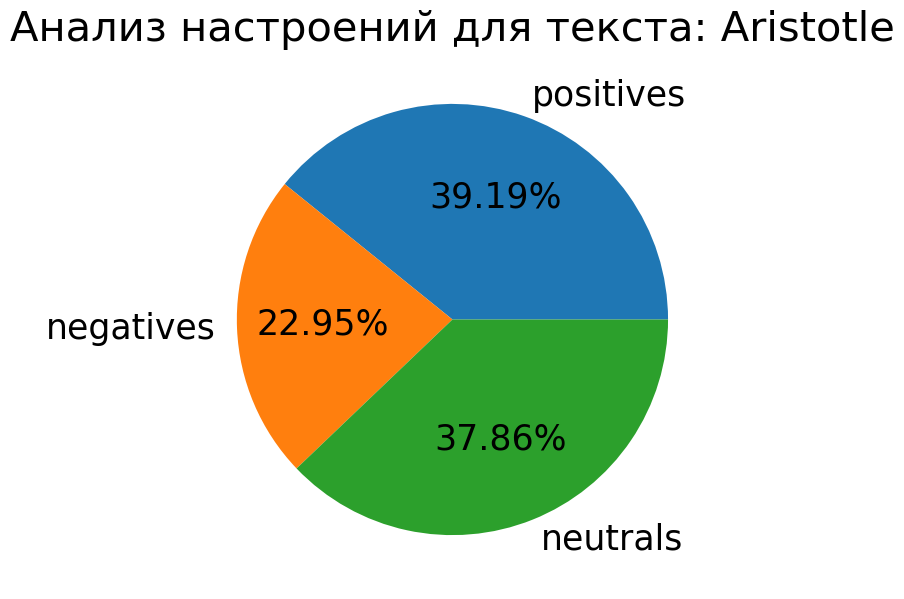

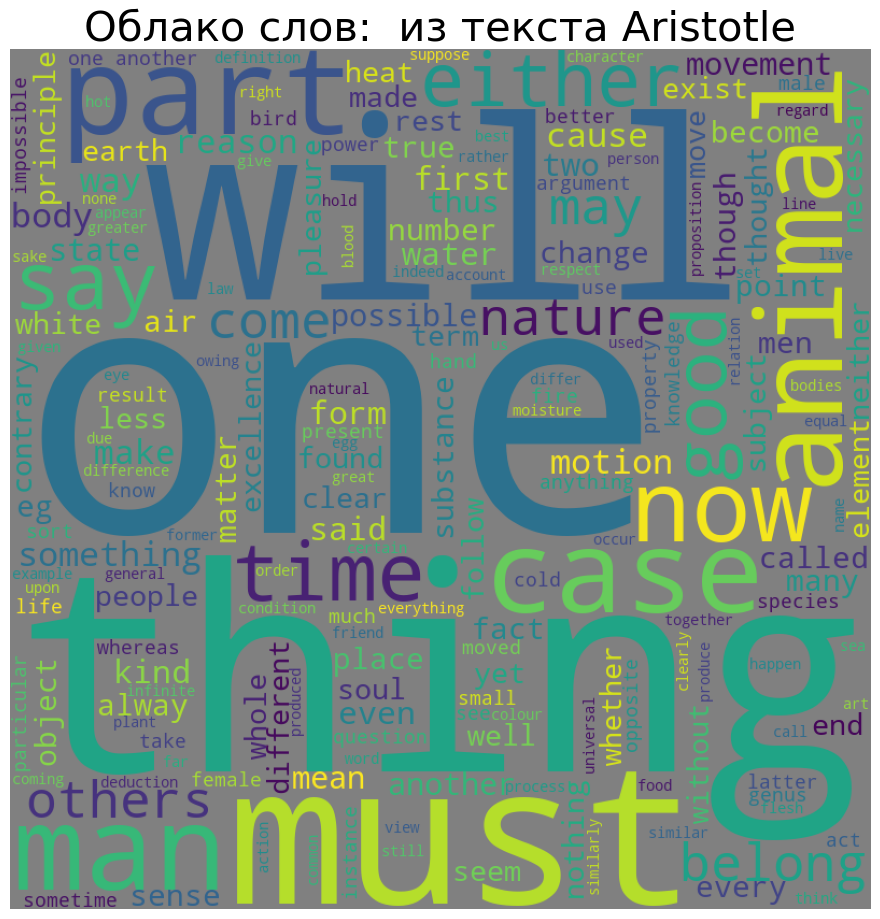

Сокращенно, о чем автор говорит: 
Всего предложений = 360
Резюме: 





In [21]:
Analyzer(dataFrame, 'Aristotle')

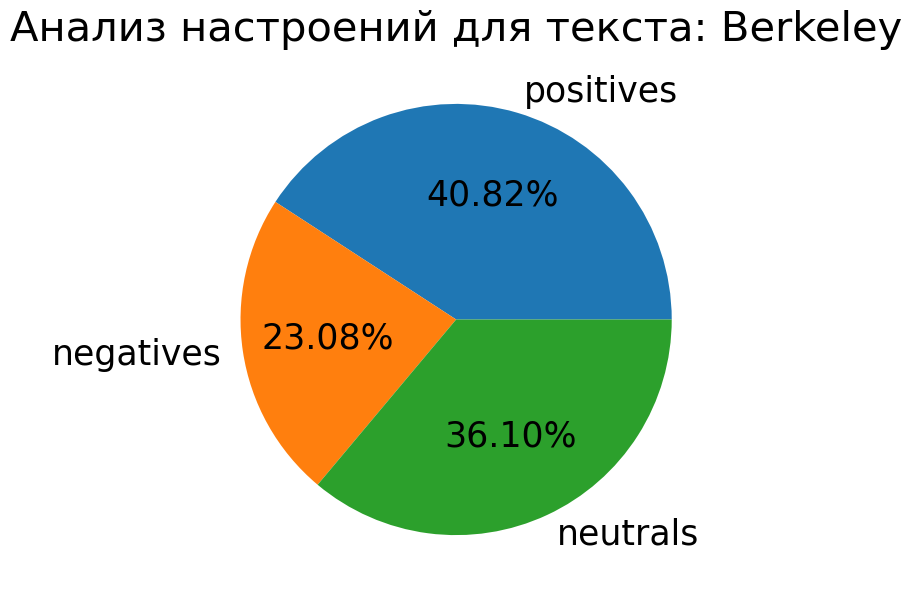

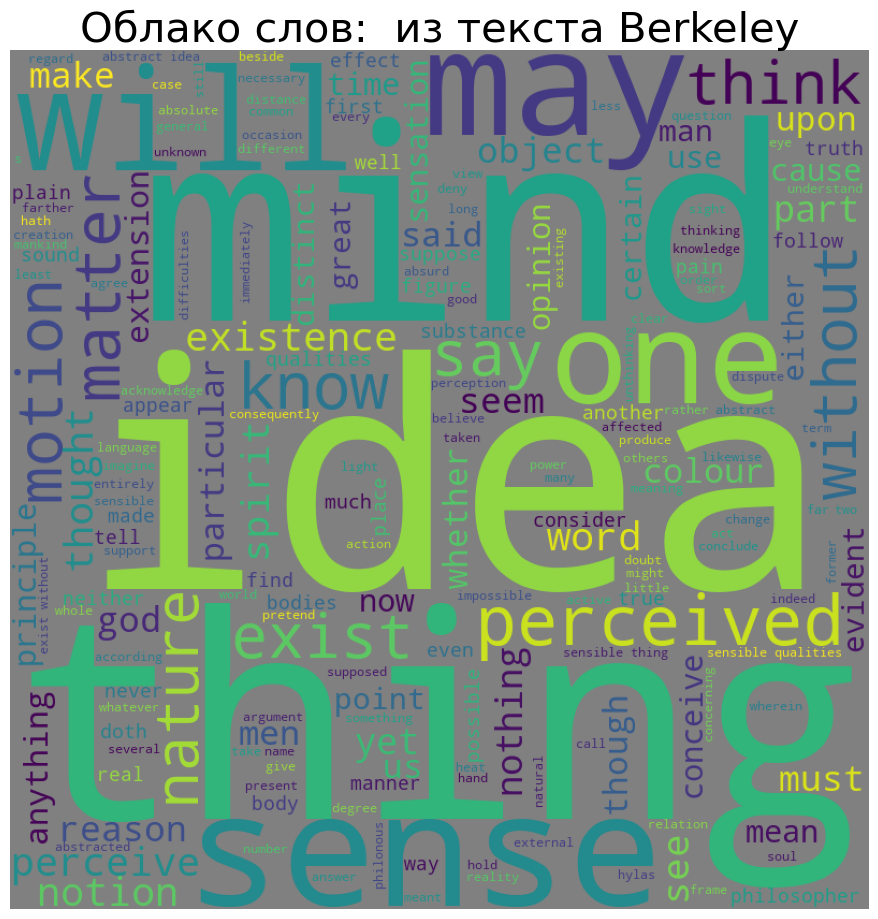

Сокращенно, о чем автор говорит: 
Всего предложений = 263
Резюме: 





In [22]:
Analyzer(dataFrame, 'Berkeley')

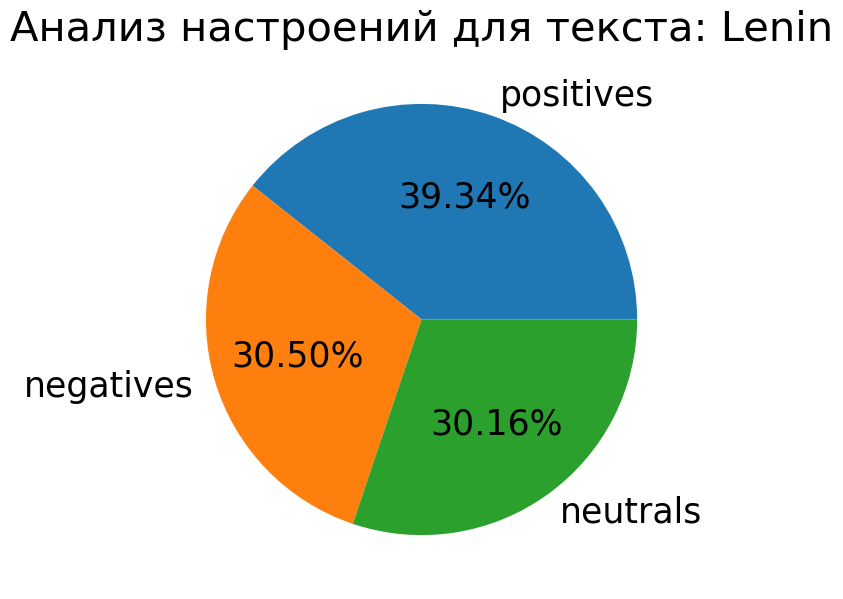

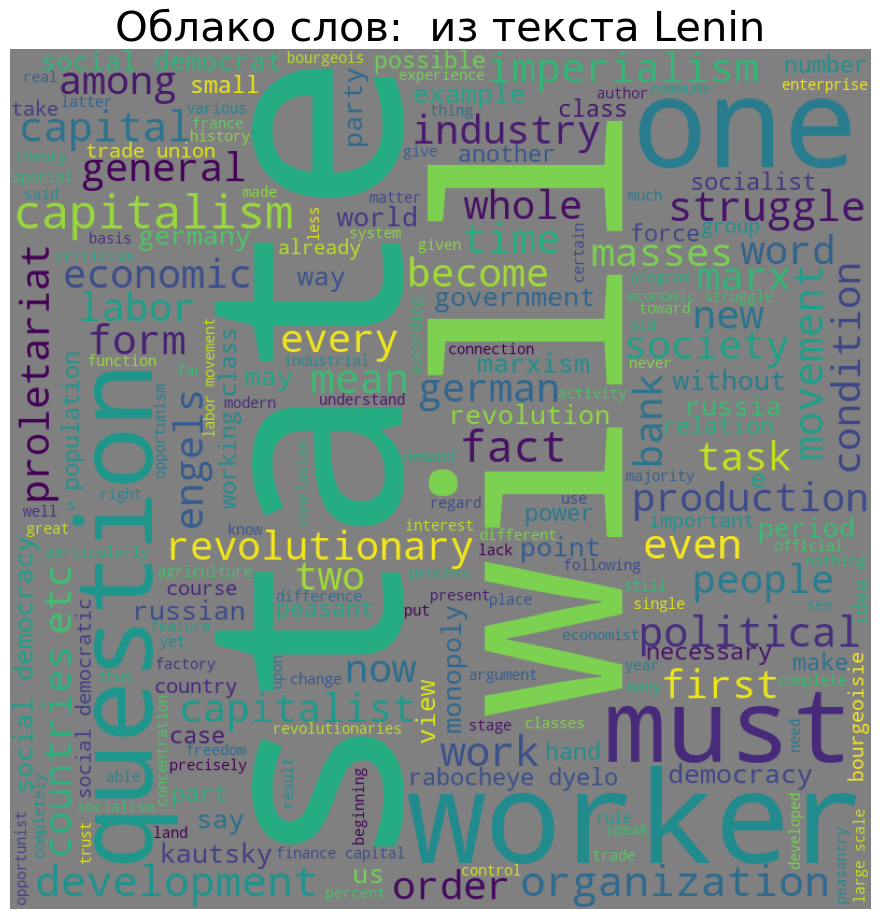

Сокращенно, о чем автор говорит: 
Всего предложений = 115
Резюме: 





In [23]:
Analyzer(dataFrame, 'Lenin')

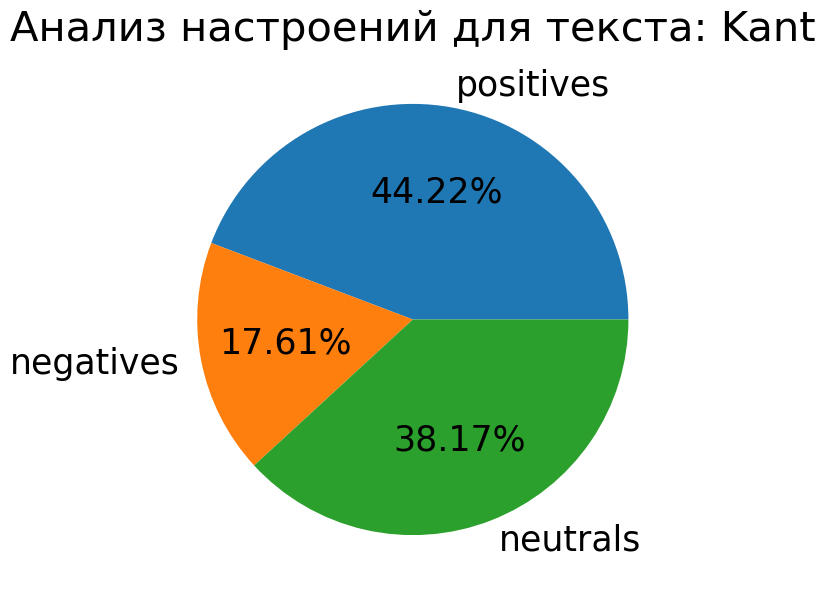

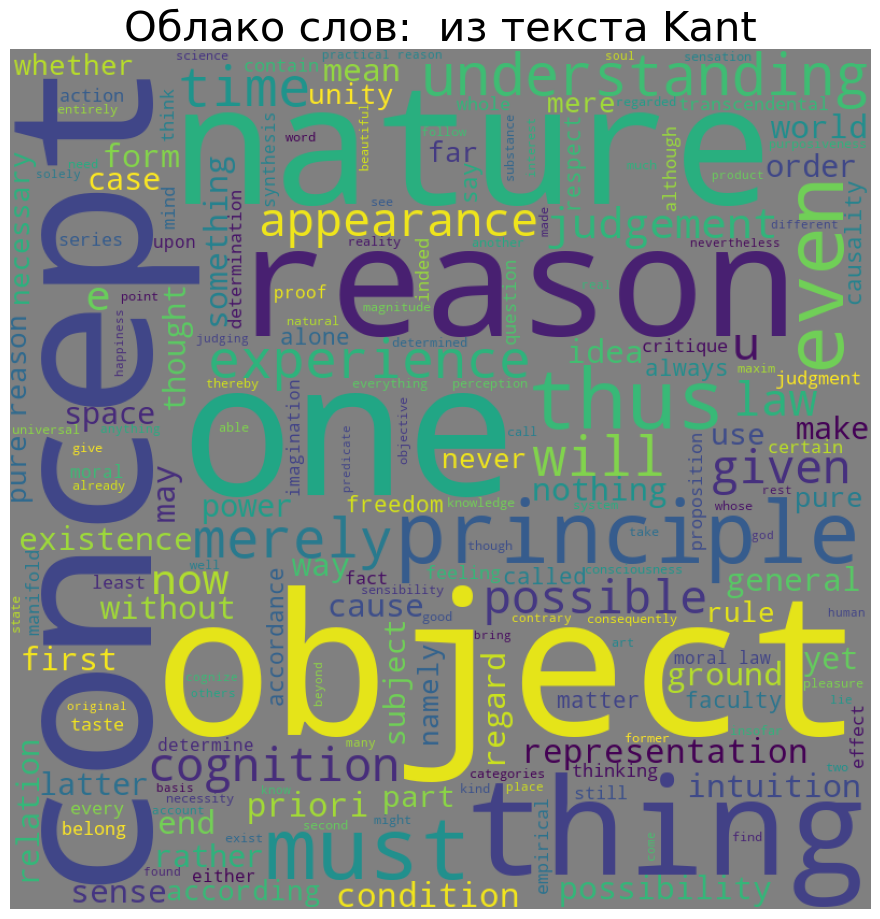

Сокращенно, о чем автор говорит: 
Всего предложений = 182
Резюме: 





In [24]:
Analyzer(dataFrame, 'Kant')

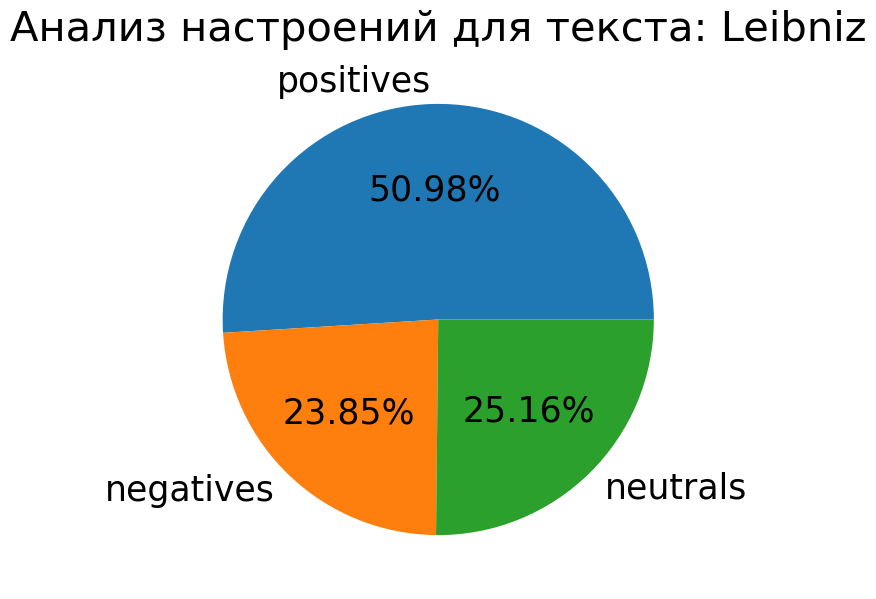

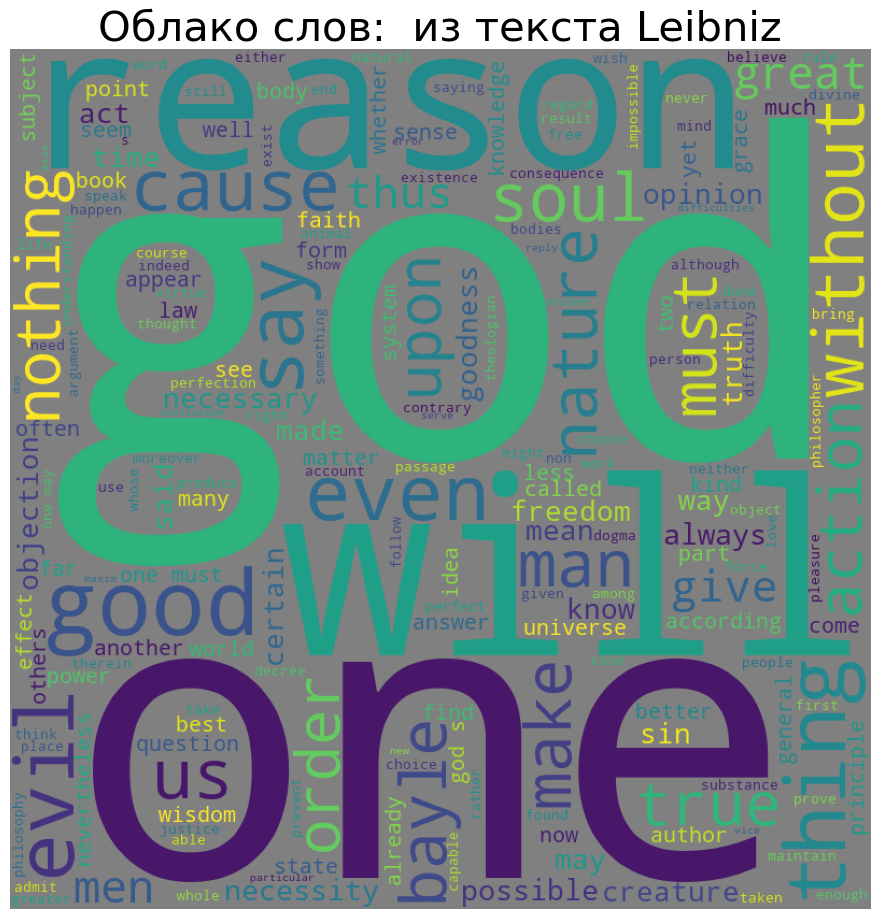

Сокращенно, о чем автор говорит: 
Всего предложений = 262
Резюме: 





In [25]:
Analyzer(dataFrame, 'Leibniz')